In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df_v3 = pd.read_csv(root / "data" / "processed" / "merged" / "state1_clean.csv", header=0)
df_v3.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,1.046972,9.521707,69.319600,22.941639
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,1.153392,11.245602,84.723694,20.737572
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,5.708309,24.616348,105.462135,18.996666
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,3.099853,17.929585,57.610783,23.959110
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,1.197121,2.787075,16.806042,91.713660


In [ ]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53944 entries, 0 to 53943
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_ios                          53944 non-null  int64  
 1   source_file                     53944 non-null  object 
 2   eventType                       53944 non-null  float64
 3   eventSampleSpeed                53944 non-null  float64
 4   eventDurationSeconds            53944 non-null  float64
 5   eventMilesDriven                53944 non-null  float64
 6   eventSensorDetectionMthd        53944 non-null  float64
 7   eventGPSSignalStrength          53944 non-null  float64
 8   eventStartSpeed                 53944 non-null  float64
 9   eventEndSpeed                   53944 non-null  float64
 10  memsMedianHorizontalNorm        53944 non-null  float64
 11  gyro_angular_change_per_second  53944 non-null  float64
 12  gyroAngleChange                 

In [ ]:
df_v3.drop(columns=['source_file'], inplace=True)

sub_df_left = df_v3[df_v3['eventType'] == 4]
sub_df_right = df_v3[df_v3['eventType'] == 5]

In [ ]:
scaler =StandardScaler()

X_features = sub_df_left.drop(columns=['eventType'])
features = scaler.fit_transform(X_features)
scaled_df = pd.DataFrame(features,columns=X_features.columns)

# Print the scaled data
X = scaled_df.values
scaled_df.head(2)


,is_ios,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,-7.057567,-0.683309,0.736331,-0.309477,0.863878,-1.952891,0.313634,-1.341506,-0.911557,-0.575256,0.135539,-0.299123
1,-7.057567,-0.816295,0.824479,-0.355795,0.863878,-1.850154,-0.939736,-0.913205,-0.808508,-0.267585,0.539189,-0.371133


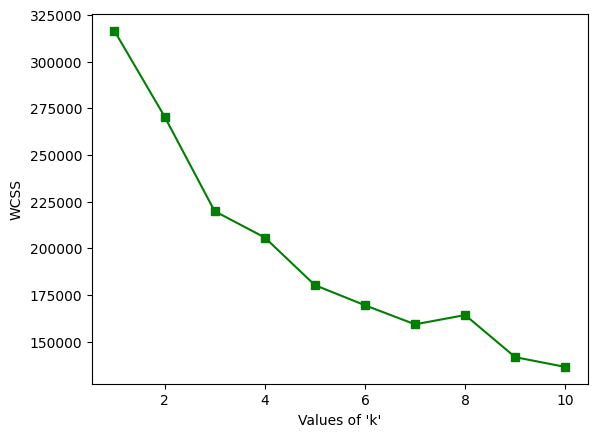

In [ ]:
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
    
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_scores = {}
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels_k = kmeans_model.fit_predict(X)
    if k == 1:
        silhouette_scores[k] = None  # Silhouette score is not defined for k=1
    else:
        silhouette_scores[k] = silhouette_score(X, labels_k)

for k, score in silhouette_scores.items():
    print(f"k={k}: Silhouette Score = {score:.4f}" if score is not None else f"k={k}: Silhouette Score = N/A")

k=1: Silhouette Score = N/A
k=2: Silhouette Score = 0.1775
k=3: Silhouette Score = 0.2187
k=4: Silhouette Score = 0.2078
k=5: Silhouette Score = 0.1680
k=6: Silhouette Score = 0.1742
k=7: Silhouette Score = 0.1768
k=8: Silhouette Score = 0.1689
k=9: Silhouette Score = 0.1823
k=10: Silhouette Score = 0.1759


In [ ]:
results = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)

    sil = silhouette_score(features, labels)
    ch = calinski_harabasz_score(features, labels)

    results.append((k, sil, ch))

for r in results:
    print(f"k={r[0]} | Silhouette={r[1]:.3f} | CH Score={r[2]:.0f}")

k=2 | Silhouette=0.178 | CH Score=4466
k=3 | Silhouette=0.219 | CH Score=5786
k=4 | Silhouette=0.208 | CH Score=4723
k=5 | Silhouette=0.168 | CH Score=4974
k=6 | Silhouette=0.174 | CH Score=4567
k=7 | Silhouette=0.177 | CH Score=4332
k=8 | Silhouette=0.169 | CH Score=3486
k=9 | Silhouette=0.182 | CH Score=4061


In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
sub_df_left['cluster'] = kmeans.fit_predict(X)

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_92329/2371074905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_left['cluster'] = kmeans.fit_predict(X)


In [ ]:
kmeans.cluster_centers_

array([[ 0.09877867, -0.28016419, -0.86581866, -0.52810177, -1.29189899,
        -0.12344716, -0.23091759, -0.35458392, -0.03662615, -0.67837932,
        -1.13171893,  0.30014652],
       [ 0.08603835,  0.34983086,  0.20803744,  0.21736738,  0.54271221,
        -0.40112753,  0.32405042,  0.3785486 ,  0.42675627,  0.24591575,
         0.37108627, -0.05555304],
       [-0.15172426, -0.24145579, -0.10162993, -0.22181129,  0.13906593,
         2.07099608, -0.24486465, -0.19205617,  0.05603769,  0.57235282,
         0.21747501, -0.40759083],
       [-0.11640585, -0.7449223 ,  0.29852251, -0.30582299,  0.46841612,
        -0.41458681, -0.69115424, -0.65667718, -0.32758978,  0.44047834,
         0.59634697, -0.50223381],
       [ 0.03643957,  2.04418903,  0.80958595,  1.75445566,  0.23837911,
         0.08288371,  1.85369785,  1.85364157, -0.16850085, -0.85821837,
        -0.13569316,  1.24338666]])

In [ ]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.688593,1.011600
1,-1.178847,1.518824
2,-1.330571,-0.127692
3,0.333261,0.673914
4,-0.557307,0.559129


In [ ]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[-0.75424874, -1.96090692],
       [ 0.62815242,  0.58900209],
       [-0.67036298,  0.40452524],
       [-1.1896481 ,  1.10061522],
       [ 4.12462882, -0.31147984]])

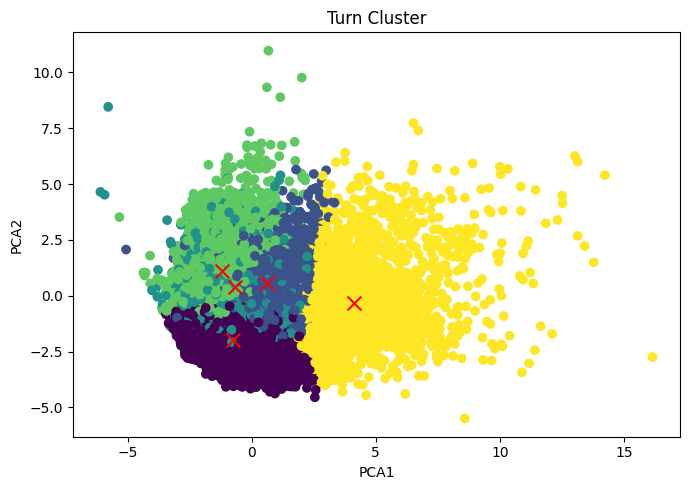

In [ ]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [ ]:
sub_df_left.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2,3,4
is_ios,0.994037,0.992267,0.959204,0.964145,0.985423
eventType,4.000000,4.000000,4.000000,4.000000,4.000000
eventSampleSpeed,13.402533,18.101931,13.694012,9.933796,30.741713
eventDurationSeconds,2.632622,5.720628,4.840189,5.984341,7.454096
eventMilesDriven,0.012791,0.027053,0.018697,0.017060,0.056523
eventSensorDetectionMthd,0.056802,1.710534,1.348564,1.643354,1.436589
eventGPSSignalStrength,5.276826,4.697823,9.827080,4.671054,5.701446
eventStartSpeed,12.487625,17.411860,12.363916,8.402776,30.964395
eventEndSpeed,14.418752,20.077993,15.678205,12.083902,31.481128
memsMedianHorizontalNorm,1.950559,2.428617,2.045921,1.650155,1.816171


In [ ]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)
sub_df_left['cluster'] = kmeans.fit_predict(X)

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_92329/1366429012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_left['cluster'] = kmeans.fit_predict(X)


In [ ]:
kmeans.cluster_centers_

array([[ 1.41691894e-01,  3.86568745e-02,  2.26751208e+00,
         1.56066690e+00,  3.54272689e-01, -1.14697121e-01,
         8.86667152e-03,  1.17576241e-01, -5.92915574e-01,
        -3.76105130e-01,  1.52160970e+00,  1.71670002e-01],
       [ 1.41691894e-01, -2.50557224e-01, -1.86030665e-01,
        -2.68112365e-01,  1.33417759e-01,  1.99608396e+00,
        -2.58496088e-01, -1.95310446e-01,  7.78988910e-02,
         5.96924940e-01,  1.59082065e-01, -4.24547970e-01],
       [ 1.41691894e-01, -7.49462604e-01,  9.14104987e-02,
        -3.98476254e-01,  4.73701679e-01, -3.93341058e-01,
        -7.02732716e-01, -6.52220474e-01, -2.84005992e-01,
         4.85629197e-01,  4.33992352e-01, -5.13025641e-01],
       [ 1.41691894e-01, -2.97485052e-01, -8.74714906e-01,
        -5.31893206e-01, -1.30929483e+00, -1.25372031e-01,
        -2.46299211e-01, -3.70246730e-01, -5.58516698e-02,
        -7.13846591e-01, -1.14704967e+00,  3.04628306e-01],
       [ 9.75607619e-02,  2.18091828e+00,  3.6456121

In [ ]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.688593,1.011600
1,-1.178847,1.518824
2,-1.330571,-0.127692
3,0.333261,0.673914
4,-0.557307,0.559129


In [ ]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[ 1.45931473,  2.31347329],
       [-0.72924476,  0.32319964],
       [-1.29527824,  0.8961968 ],
       [-0.77334079, -1.99137899],
       [ 4.05340549, -0.86557591],
       [ 0.5125849 ,  0.46889643],
       [-0.51630843,  0.53500576]])

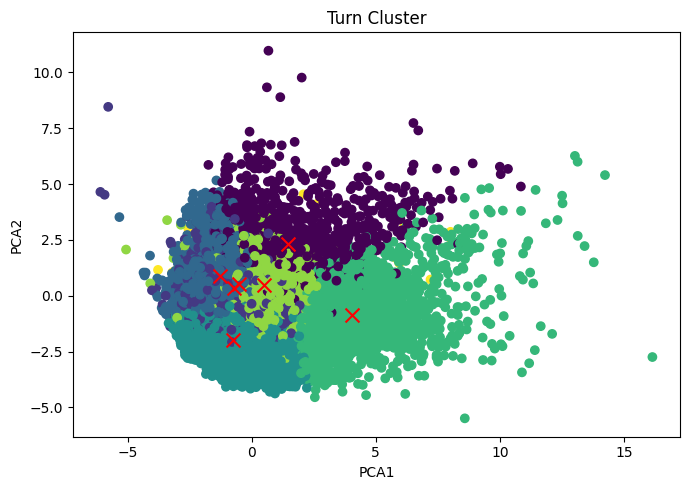

In [ ]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [ ]:
sub_df_left.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2,3,4,5,6
is_ios,1.000000,1.000000,1.000000,1.000000,0.993875,1.000000,0.000000
eventType,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
eventSampleSpeed,15.790696,13.626335,9.896869,13.275920,31.776673,18.155563,14.438544
eventDurationSeconds,11.651434,4.590570,5.390259,2.609284,6.175177,5.245419,5.163082
eventMilesDriven,0.052860,0.017784,0.015283,0.012728,0.049177,0.024795,0.018805
eventSensorDetectionMthd,1.540314,1.341830,1.649173,0.041894,1.409147,1.700230,1.220238
eventGPSSignalStrength,5.293604,9.670228,4.714956,5.270727,5.709772,4.703486,5.833150
eventStartSpeed,14.621548,12.244897,8.297407,12.353168,32.247070,17.616252,12.701505
eventEndSpeed,18.077495,15.651881,12.113845,14.299260,32.171863,19.986697,16.411105
memsMedianHorizontalNorm,1.376221,2.068798,1.693848,1.930672,1.906154,2.564222,1.731975


In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
sub_df_left['cluster'] = kmeans.fit_predict(X)

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_92329/208876394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_left['cluster'] = kmeans.fit_predict(X)


In [ ]:
kmeans.cluster_centers_

array([[-0.03748746, -0.32746178,  0.23950934, -0.11511704,  0.53286791,
        -0.02887214, -0.31736377, -0.24394644,  0.04125133,  0.47038014,
         0.56448258, -0.37537236],
       [ 0.04729749,  1.63106672,  0.66098339,  1.34210987,  0.28674319,
         0.03190245,  1.49643727,  1.48432421, -0.09278436, -0.70970266,
        -0.08723006,  0.99468967],
       [ 0.04588063, -0.29149001, -0.8406047 , -0.53941565, -1.19730618,
         0.03790854, -0.23456654, -0.37018762, -0.02733146, -0.50962927,
        -1.04610312,  0.16322682]])

In [ ]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

centers=pca.transform(kmeans.cluster_centers_)

#Reduced Features
reduced_X.head()


,PCA1,PCA2
0,-0.688593,1.011600
1,-1.178847,1.518824
2,-1.330571,-0.127692
3,0.333261,0.673914
4,-0.557307,0.559129


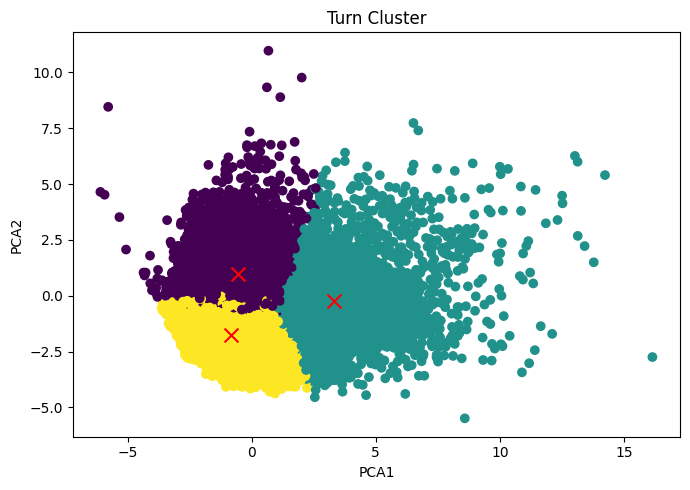

In [ ]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [ ]:
sub_df_left.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2
is_ios,0.974997,0.986891,0.986933
eventType,4.000000,4.000000,4.000000
eventSampleSpeed,13.049152,27.672803,13.327113
eventDurationSeconds,5.812222,7.028793,2.705677
eventMilesDriven,0.020703,0.048646,0.012588
eventSensorDetectionMthd,1.701329,1.480103,0.140667
eventGPSSignalStrength,5.470972,5.596253,5.609702
eventStartSpeed,11.720115,27.817709,12.464098
eventEndSpeed,15.271826,28.636862,14.305084
memsMedianHorizontalNorm,2.030648,1.892731,1.960487


In [ ]:
sub_df_left = sub_df_left.drop(columns=['eventGPSSignalStrength', 'eventType', 'evenrSensorDetectionMthd'], inplace=True)
print(sub_df_left.shape)
sub_df_left.head()

NameError: name 'sub_df_left' is not defined